In [1]:
import pandas as pd

In [3]:
data = pd.read_csv('../imputed_data.csv', parse_dates=['id'], index_col='id')


/var/folders/06/38r1ks_x7bj1pb0p5j8sp6wc0000gn/T/ipykernel_82017/3705476410.py:1: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../imputed_data.csv', parse_dates=['id'], index_col='id')


In [5]:
selected_columns = ['valeur_PM25']
data = data[selected_columns].resample('D').mean()

In [6]:
data

,valeur_PM25
id,
2020-01-01,24.800000
2020-01-02,13.316667
2020-01-03,7.691667
2020-01-04,7.666667
2020-01-05,7.891667
...,...
2024-09-27,11.078804
2024-09-28,11.078804
2024-09-29,11.078804


In [7]:
train_size = int(len(data) * 0.8)

In [8]:
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

In [9]:
train_data.head

<bound method NDFrame.head of             valeur_PM25
id                     
2020-01-01    24.800000
2020-01-02    13.316667
2020-01-03     7.691667
2020-01-04     7.666667
2020-01-05     7.891667
...                 ...
2023-10-15     4.583333
2023-10-16     5.766667
2023-10-17     8.791667
2023-10-18     7.200000
2023-10-19     5.962500

[1388 rows x 1 columns]>

In [11]:
test_data.head

<bound method NDFrame.head of             valeur_PM25
id                     
2023-10-20     5.487500
2023-10-21     5.870833
2023-10-22     9.412500
2023-10-23     6.487500
2023-10-24     6.529167
...                 ...
2024-09-27    11.078804
2024-09-28    11.078804
2024-09-29    11.078804
2024-09-30    11.078804
2024-10-01    11.078804

[348 rows x 1 columns]>

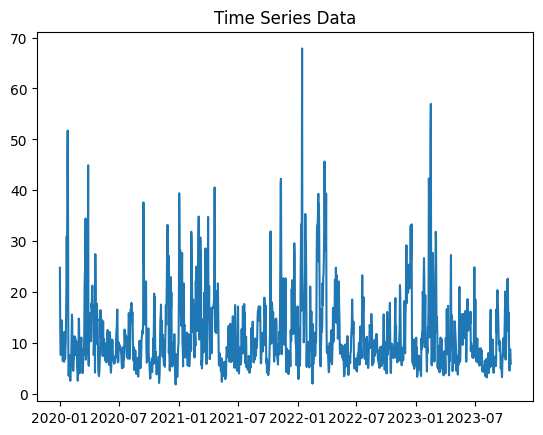

In [12]:
import matplotlib.pyplot as plt
plt.plot(train_data.valeur_PM25)
plt.title("Time Series Data")
plt.show()

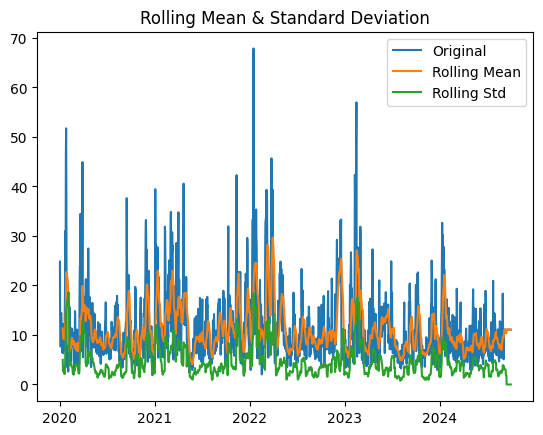

In [13]:
rolmean = data.rolling(window=12).mean()
rolstd = data.rolling(window=12).std()

plt.plot(data, label='Original')
plt.plot(rolmean, label='Rolling Mean')
plt.plot(rolstd, label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

In [14]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['valeur_PM25'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -12.753059063059359
p-value: 8.453029427194876e-24
Critical Values:
   1%: -3.4341311883170507
   5%: -2.8632101835566965
   10%: -2.567659158097275


In [10]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [19]:
# 定义SARIMA模型
model = SARIMAX(train_data['valeur_PM25'], order=(2, 0, 2), seasonal_order=(1, 1, 1, 90))
sarima_model = model.fit()

# 输出模型摘要信息
print(sarima_model.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.02999D+00    |proj g|=  5.51771D-02


 This problem is unconstrained.



At iterate    5    f=  2.93955D+00    |proj g|=  3.03681D-02

At iterate   10    f=  2.93771D+00    |proj g|=  1.12943D-02

At iterate   15    f=  2.93685D+00    |proj g|=  2.36680D-03

At iterate   20    f=  2.93672D+00    |proj g|=  2.37577D-03

At iterate   25    f=  2.93672D+00    |proj g|=  2.50126D-04

At iterate   30    f=  2.93671D+00    |proj g|=  1.45346D-04

At iterate   35    f=  2.93671D+00    |proj g|=  1.27946D-04

At iterate   40    f=  2.93671D+00    |proj g|=  6.31244D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     40     47      1     0     0   6.312D-05   2.937D+00
  F =   2.93670801457

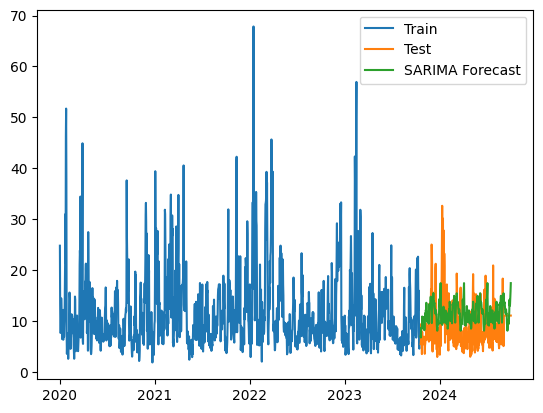

In [20]:
import matplotlib.pyplot as plt
# 使用模型进行预测
forecast = sarima_model.get_forecast(steps=len(test_data))
forecast_index = test_data.index
forecast_values = forecast.predicted_mean

# 可视化实际值和预测值
plt.plot(train_data['valeur_PM25'], label='Train')
plt.plot(test_data['valeur_PM25'], label='Test')
plt.plot(forecast_index, forecast_values, label='SARIMA Forecast')
plt.legend()
plt.show()

In [21]:
from sklearn.metrics import mean_absolute_error

# 计算 MAE
mae = mean_absolute_error(test_data['valeur_PM25'], forecast_values)
print(f'Mean Absolute Error (MAE): {mae}')

Mean Absolute Error (MAE): 4.470533331049108


In [ ]:
# 定义SARIMA模型
model = SARIMAX(train_data['valeur_PM10'], order=(1, 0, 1), seasonal_order=(1, 1, 1, 90))
sarima_model = model.fit()

# 输出模型摘要信息
print(sarima_model.summary())